In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The model is being built to predict the loan status, i.e whether the applicant will recieve the loan or not. Its a classification model(binary classification)

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
517,LP002682,Male,Yes,NaN,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N


# EXPLORATORY DATA ANALYSIS

In [6]:
df.shape

(614, 13)

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

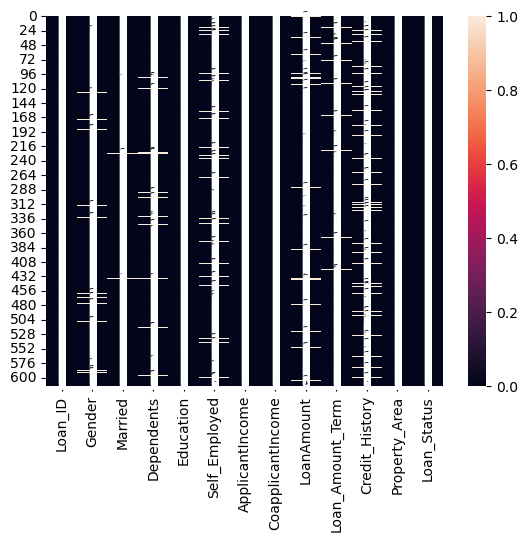

In [10]:
sns.heatmap(df.isnull(), annot = True)

In [11]:
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols = df.select_dtypes(include='float64').columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

missing_values = df.isnull().sum()
print("Remaining missing values:\n", missing_values)


Remaining missing values:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

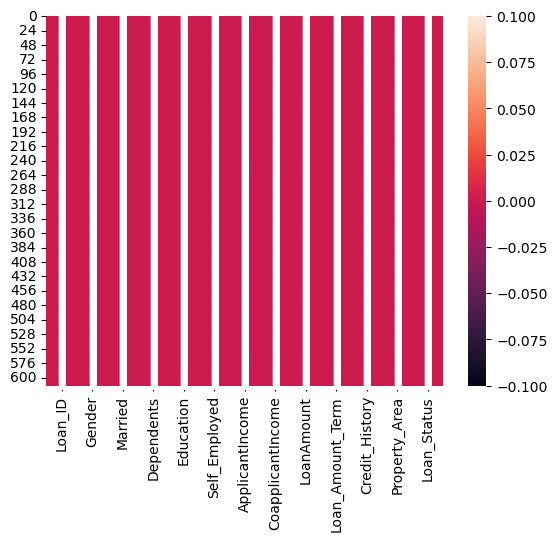

In [12]:
sns.heatmap(df.isnull(), annot = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
for i in df.columns:
    print(df[i].unique())
    print('\n')
    print(df[i].nunique())
    print('\n')

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

<Axes: xlabel='Education', ylabel='LoanAmount'>

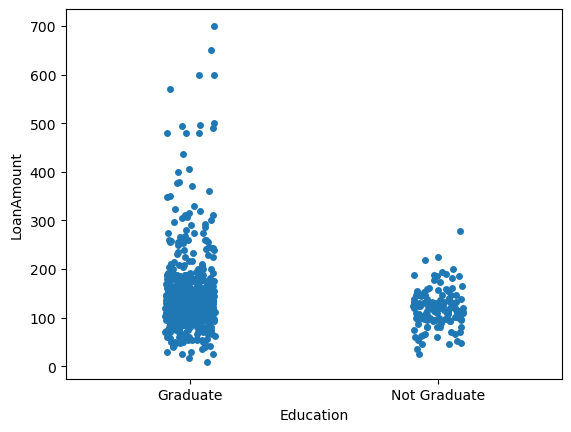

In [16]:
sns.stripplot(y="LoanAmount",x="Education",data=df)

The above graph shows that graduate category people has relatively higher amount of loan amount

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

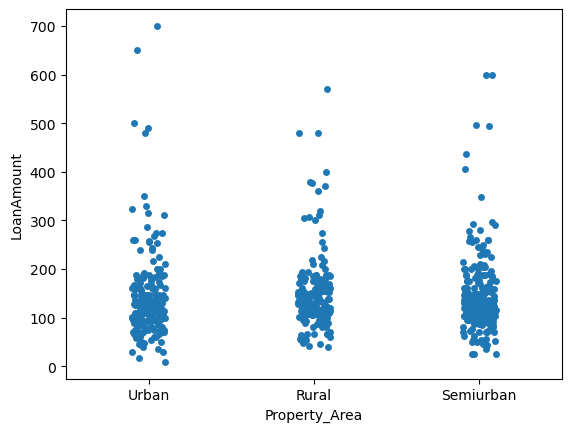

In [17]:
sns.stripplot(y="LoanAmount",x="Property_Area",data=df)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

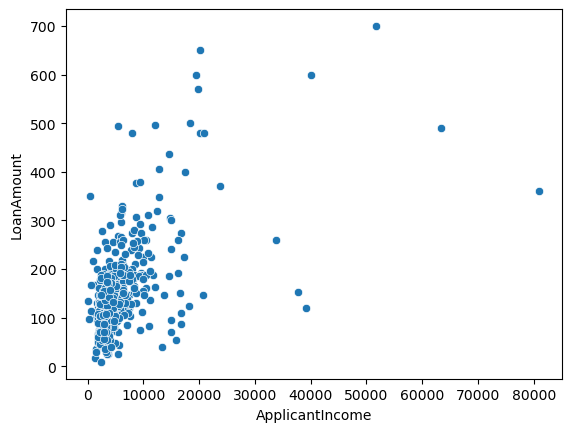

In [19]:
sns.scatterplot(y="LoanAmount",x="ApplicantIncome",data=df)

The applicant income is only crowded between 10,000-20,000 and only some applicants have scattered income in all other areas, The loan amount is also clustered between 0-300

<Axes: xlabel='Self_Employed', ylabel='Credit_History'>

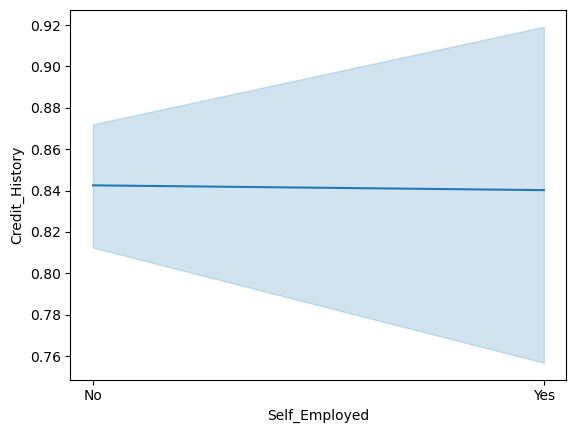

In [21]:
sns.lineplot(y="Credit_History",x="Self_Employed",data=df)

<Axes: xlabel='Dependents', ylabel='ApplicantIncome'>

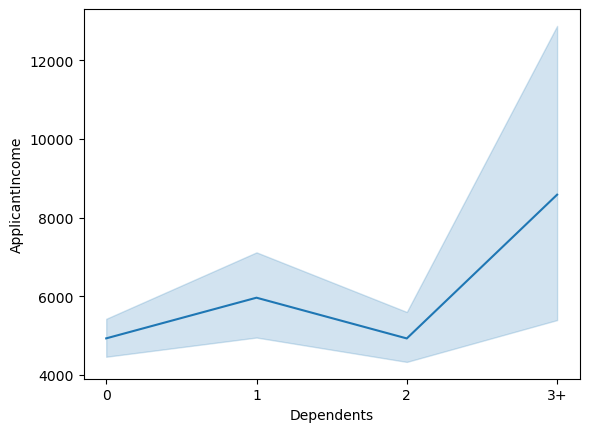

In [23]:
sns.lineplot(y="ApplicantIncome",x="Dependents",data=df)

<Axes: xlabel='Gender', ylabel='count'>

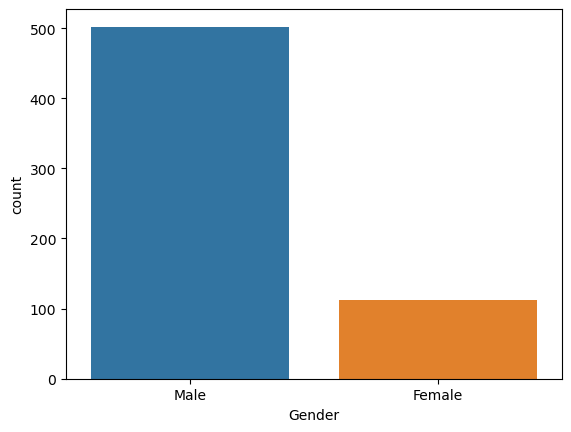

In [24]:
sns.countplot(x="Gender",data=df)

<Axes: xlabel='Dependents', ylabel='count'>

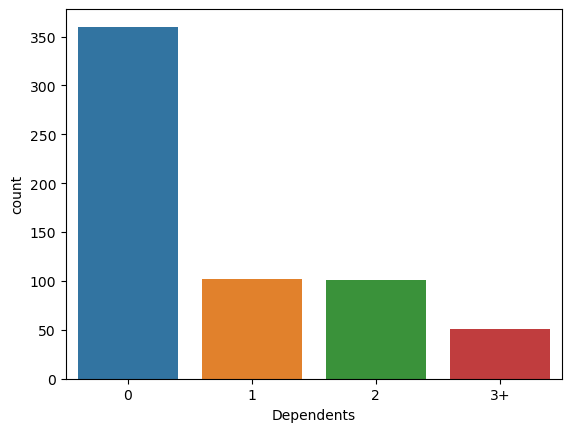

In [26]:
sns.countplot(x="Dependents",data=df)

<Axes: xlabel='Education', ylabel='count'>

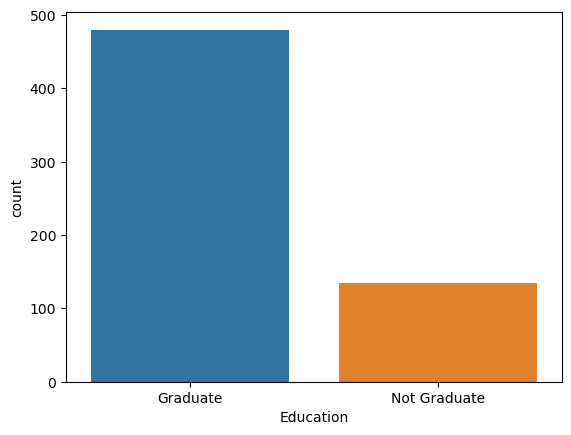

In [28]:
sns.countplot(x="Education",data=df)

The graduate category of people have been observered as availing for loan more than non-graduate people.

<Axes: xlabel='Property_Area', ylabel='count'>

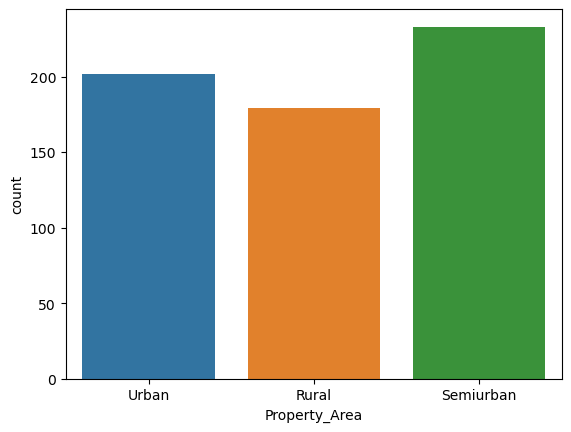

In [29]:
sns.countplot(x="Property_Area",data=df)

<Axes: xlabel='Property_Area', ylabel='ApplicantIncome'>

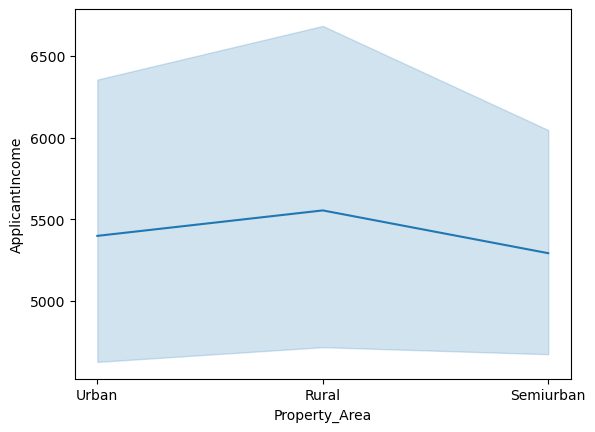

In [32]:
sns.lineplot(y="ApplicantIncome",x="Property_Area",data=df)

The applicant income in urban and rural area are almost falling in same area (in and around 5500) and semi urban has relatively low income. 

<Axes: xlabel='Married', ylabel='count'>

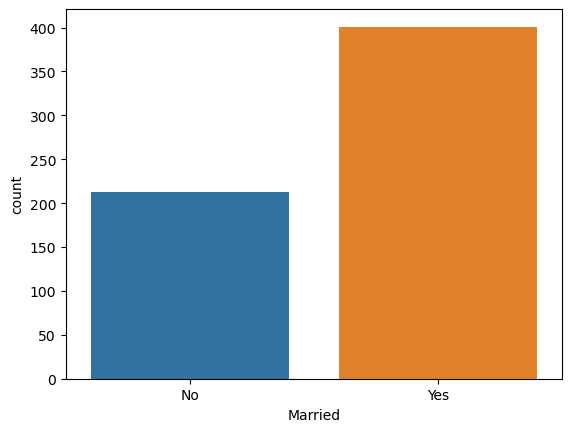

In [34]:
sns.countplot(x="Married",data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

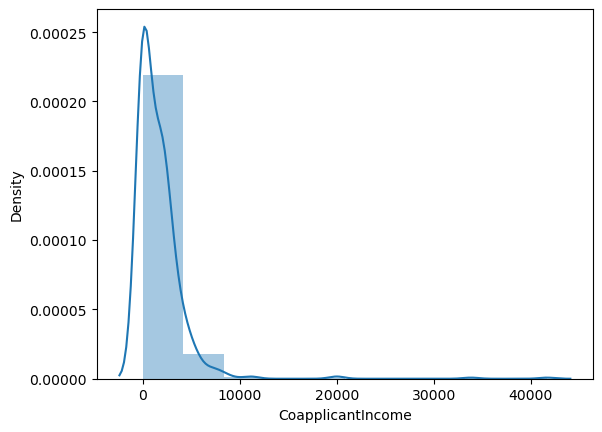

In [35]:
sns.distplot(df["CoapplicantIncome"],bins=10) 

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

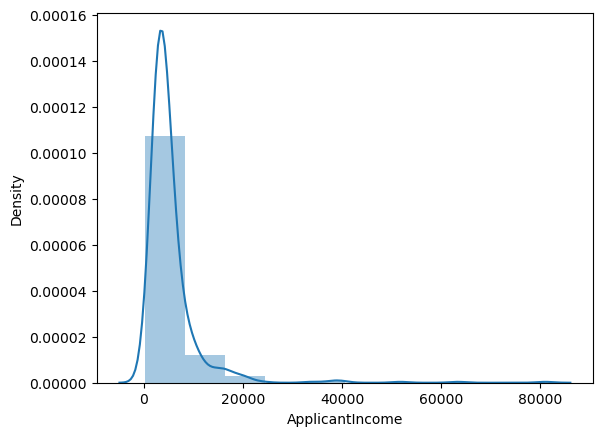

In [36]:
sns.distplot(df["ApplicantIncome"],bins=10) 

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

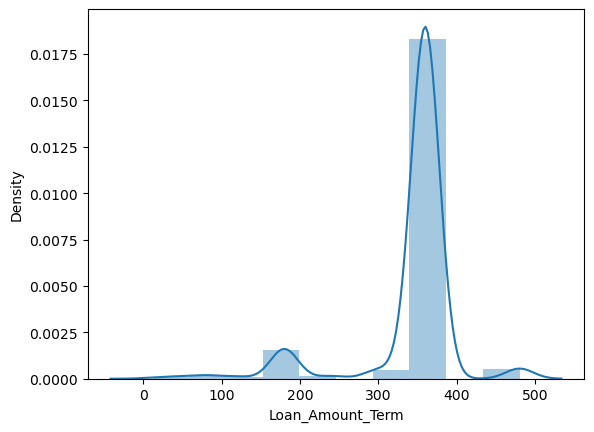

In [37]:
sns.distplot(df["Loan_Amount_Term"],bins=10) 

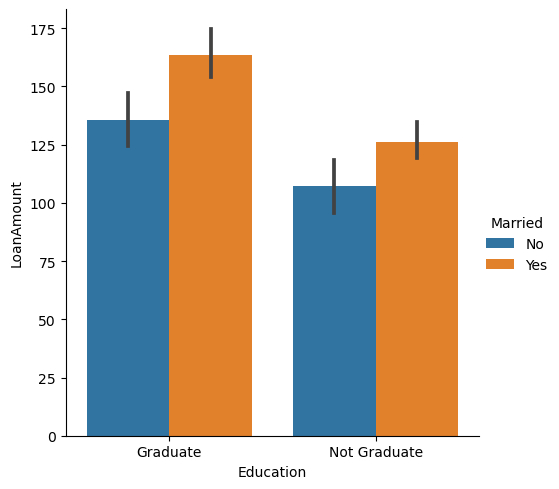

In [39]:
sns.catplot(x="Education",y="LoanAmount",hue="Married",data=df, kind='bar')

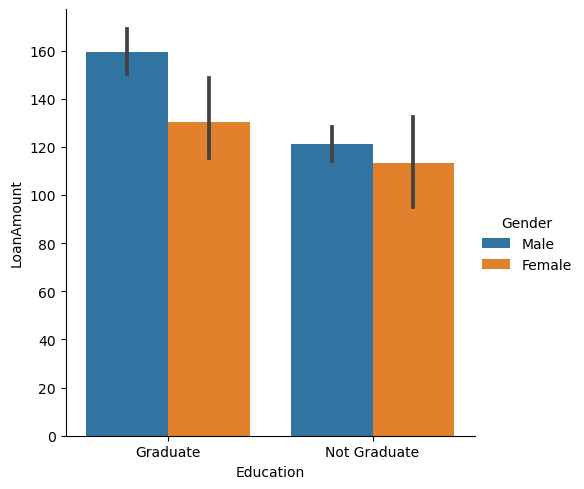

In [40]:
sns.catplot(x="Education",y="LoanAmount",hue="Gender",data=df, kind='bar')

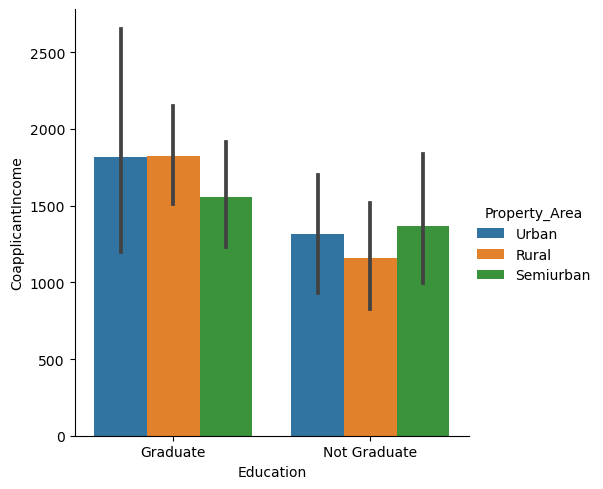

In [42]:
sns.catplot(x="Education",y="CoapplicantIncome",hue="Property_Area",data=df, kind='bar')

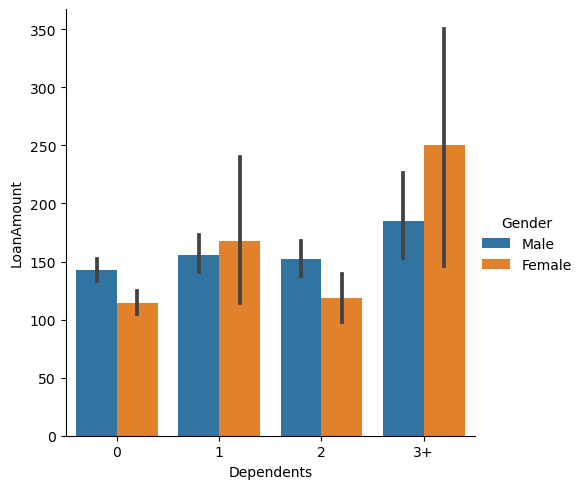

In [43]:
sns.catplot(x="Dependents",y="LoanAmount",hue="Gender",data=df, kind='bar')

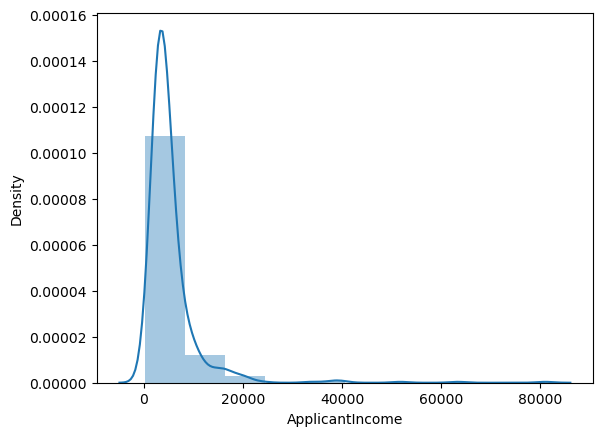

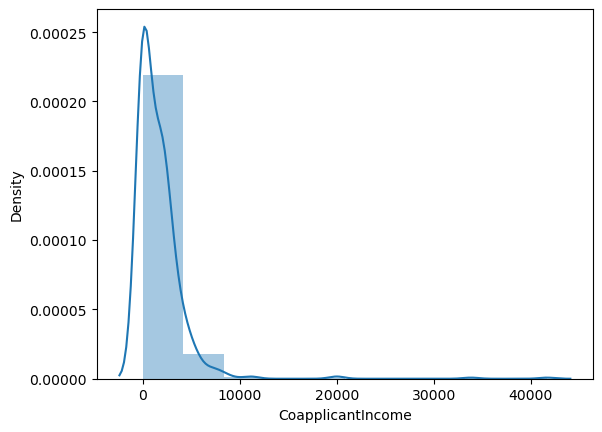

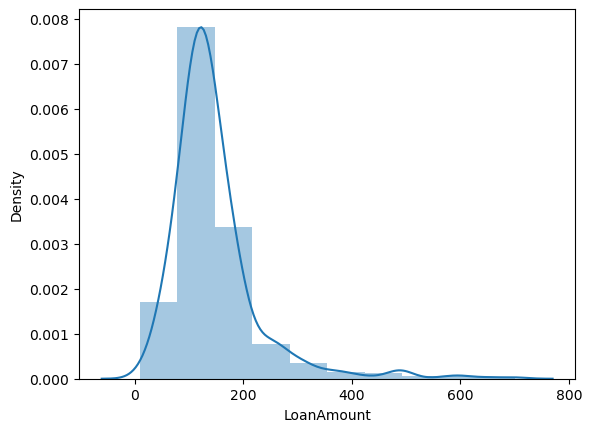

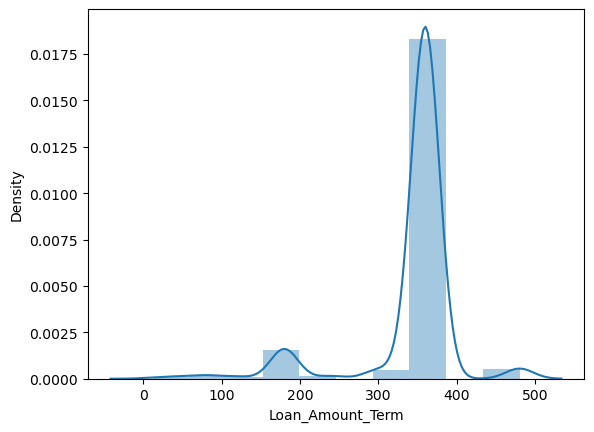

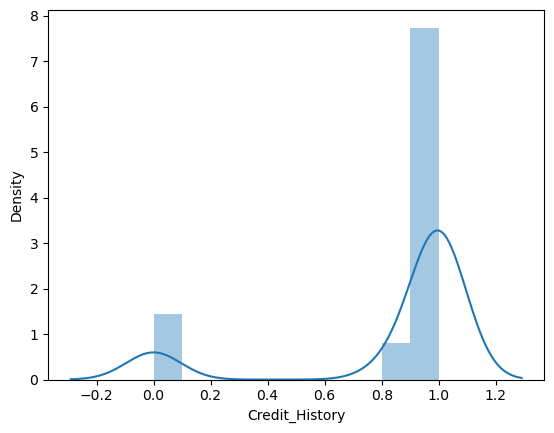

In [44]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        sns.distplot(df[i], bins=10) 
        plt.show()  
    print('\n')

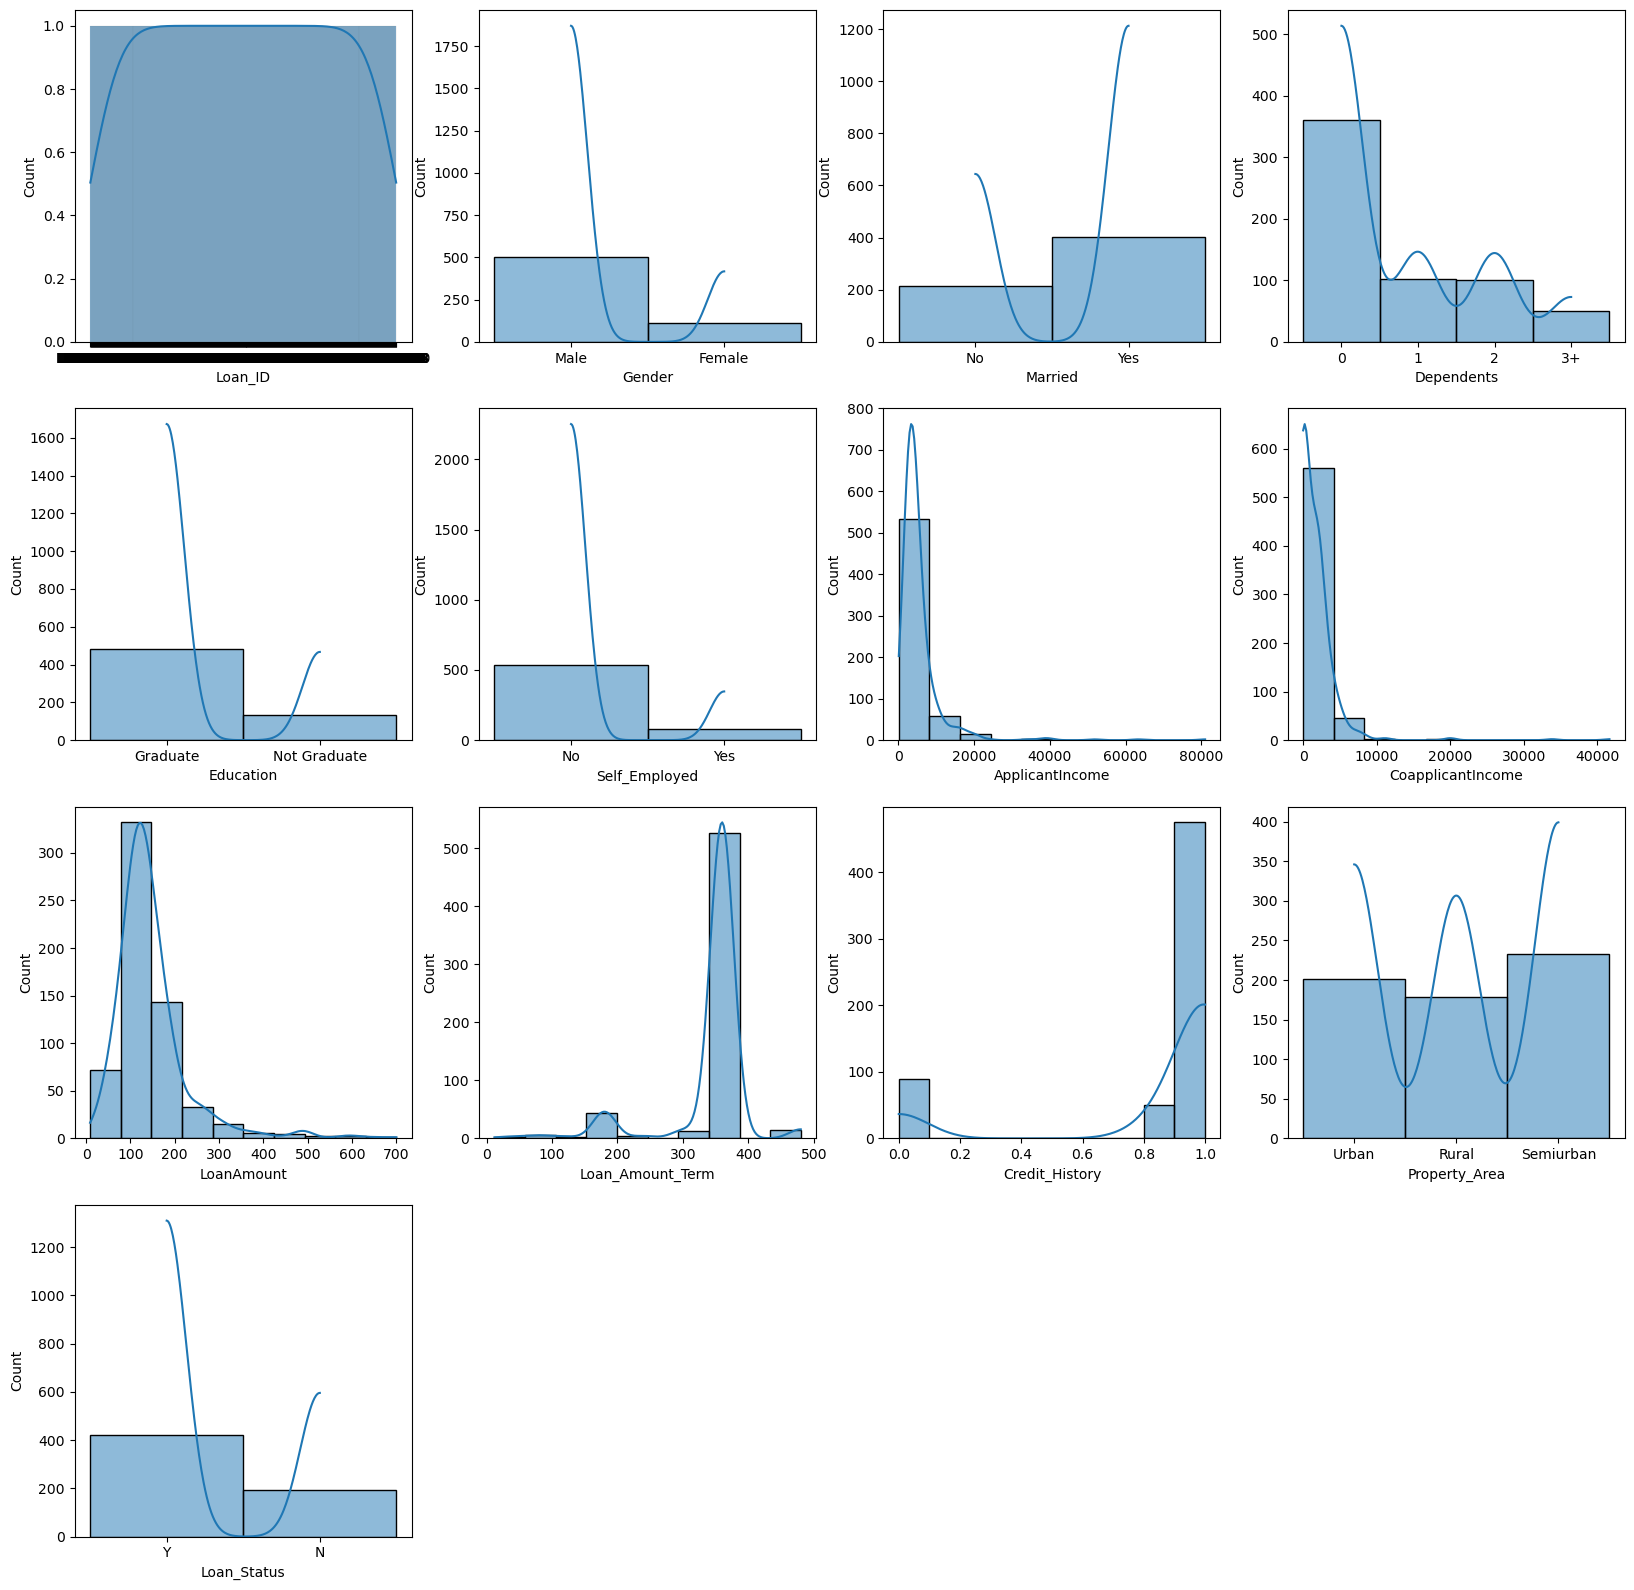

In [45]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.histplot(df[i], bins=10, kde=True, palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
    
plt.show()

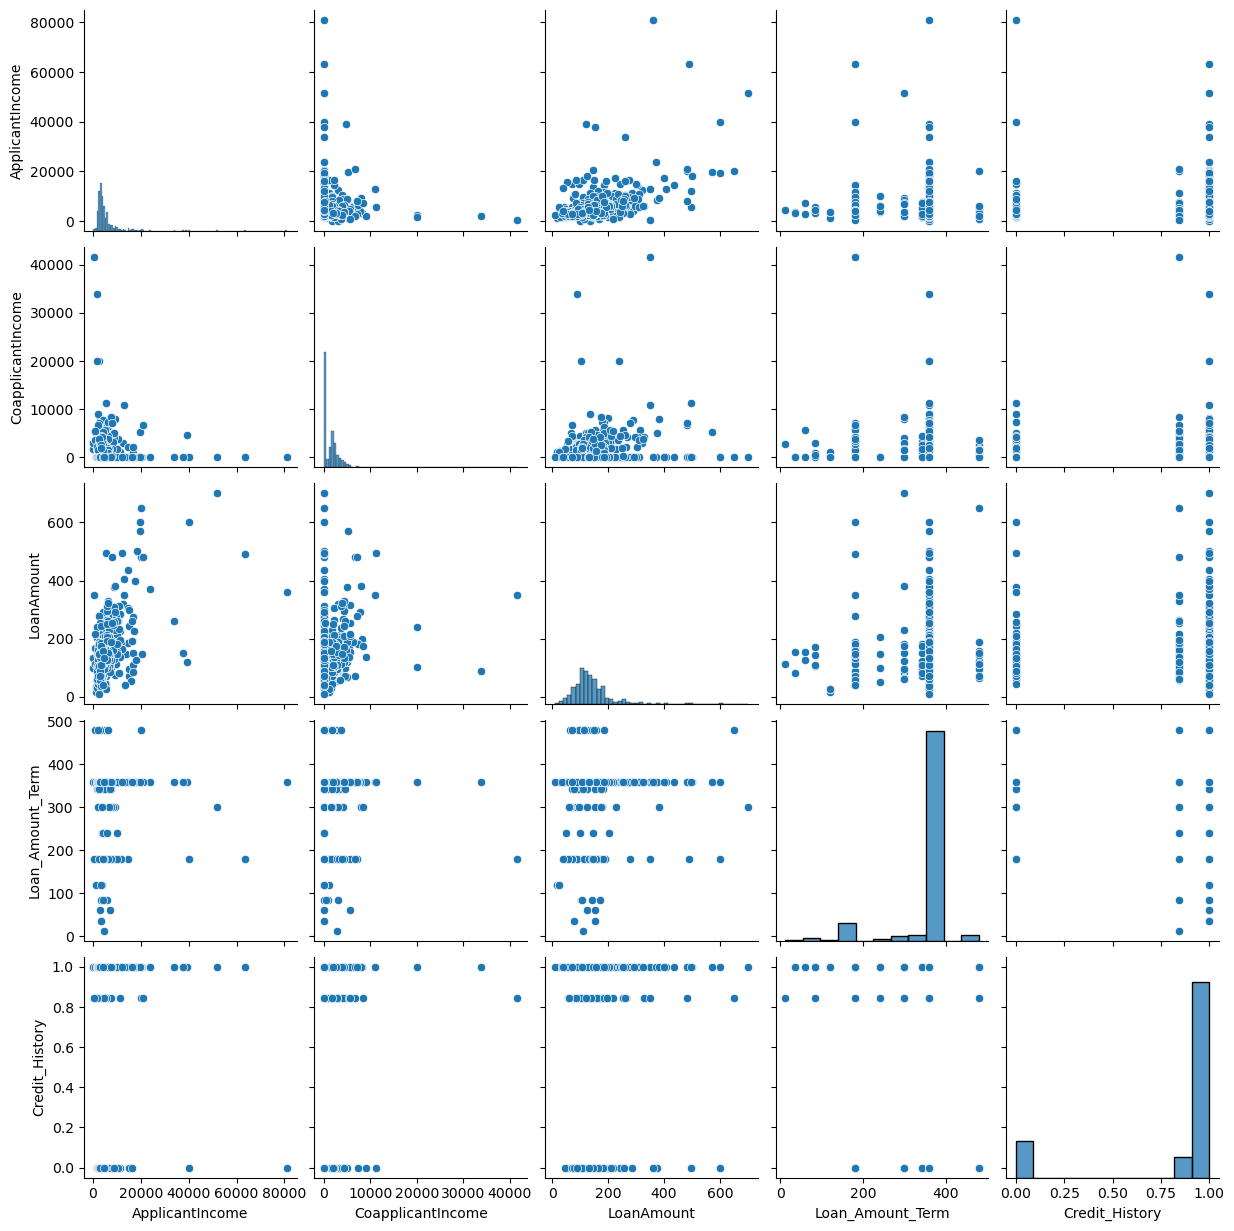

In [47]:
sns.pairplot(df, palette = "Dark2")
plt.show()

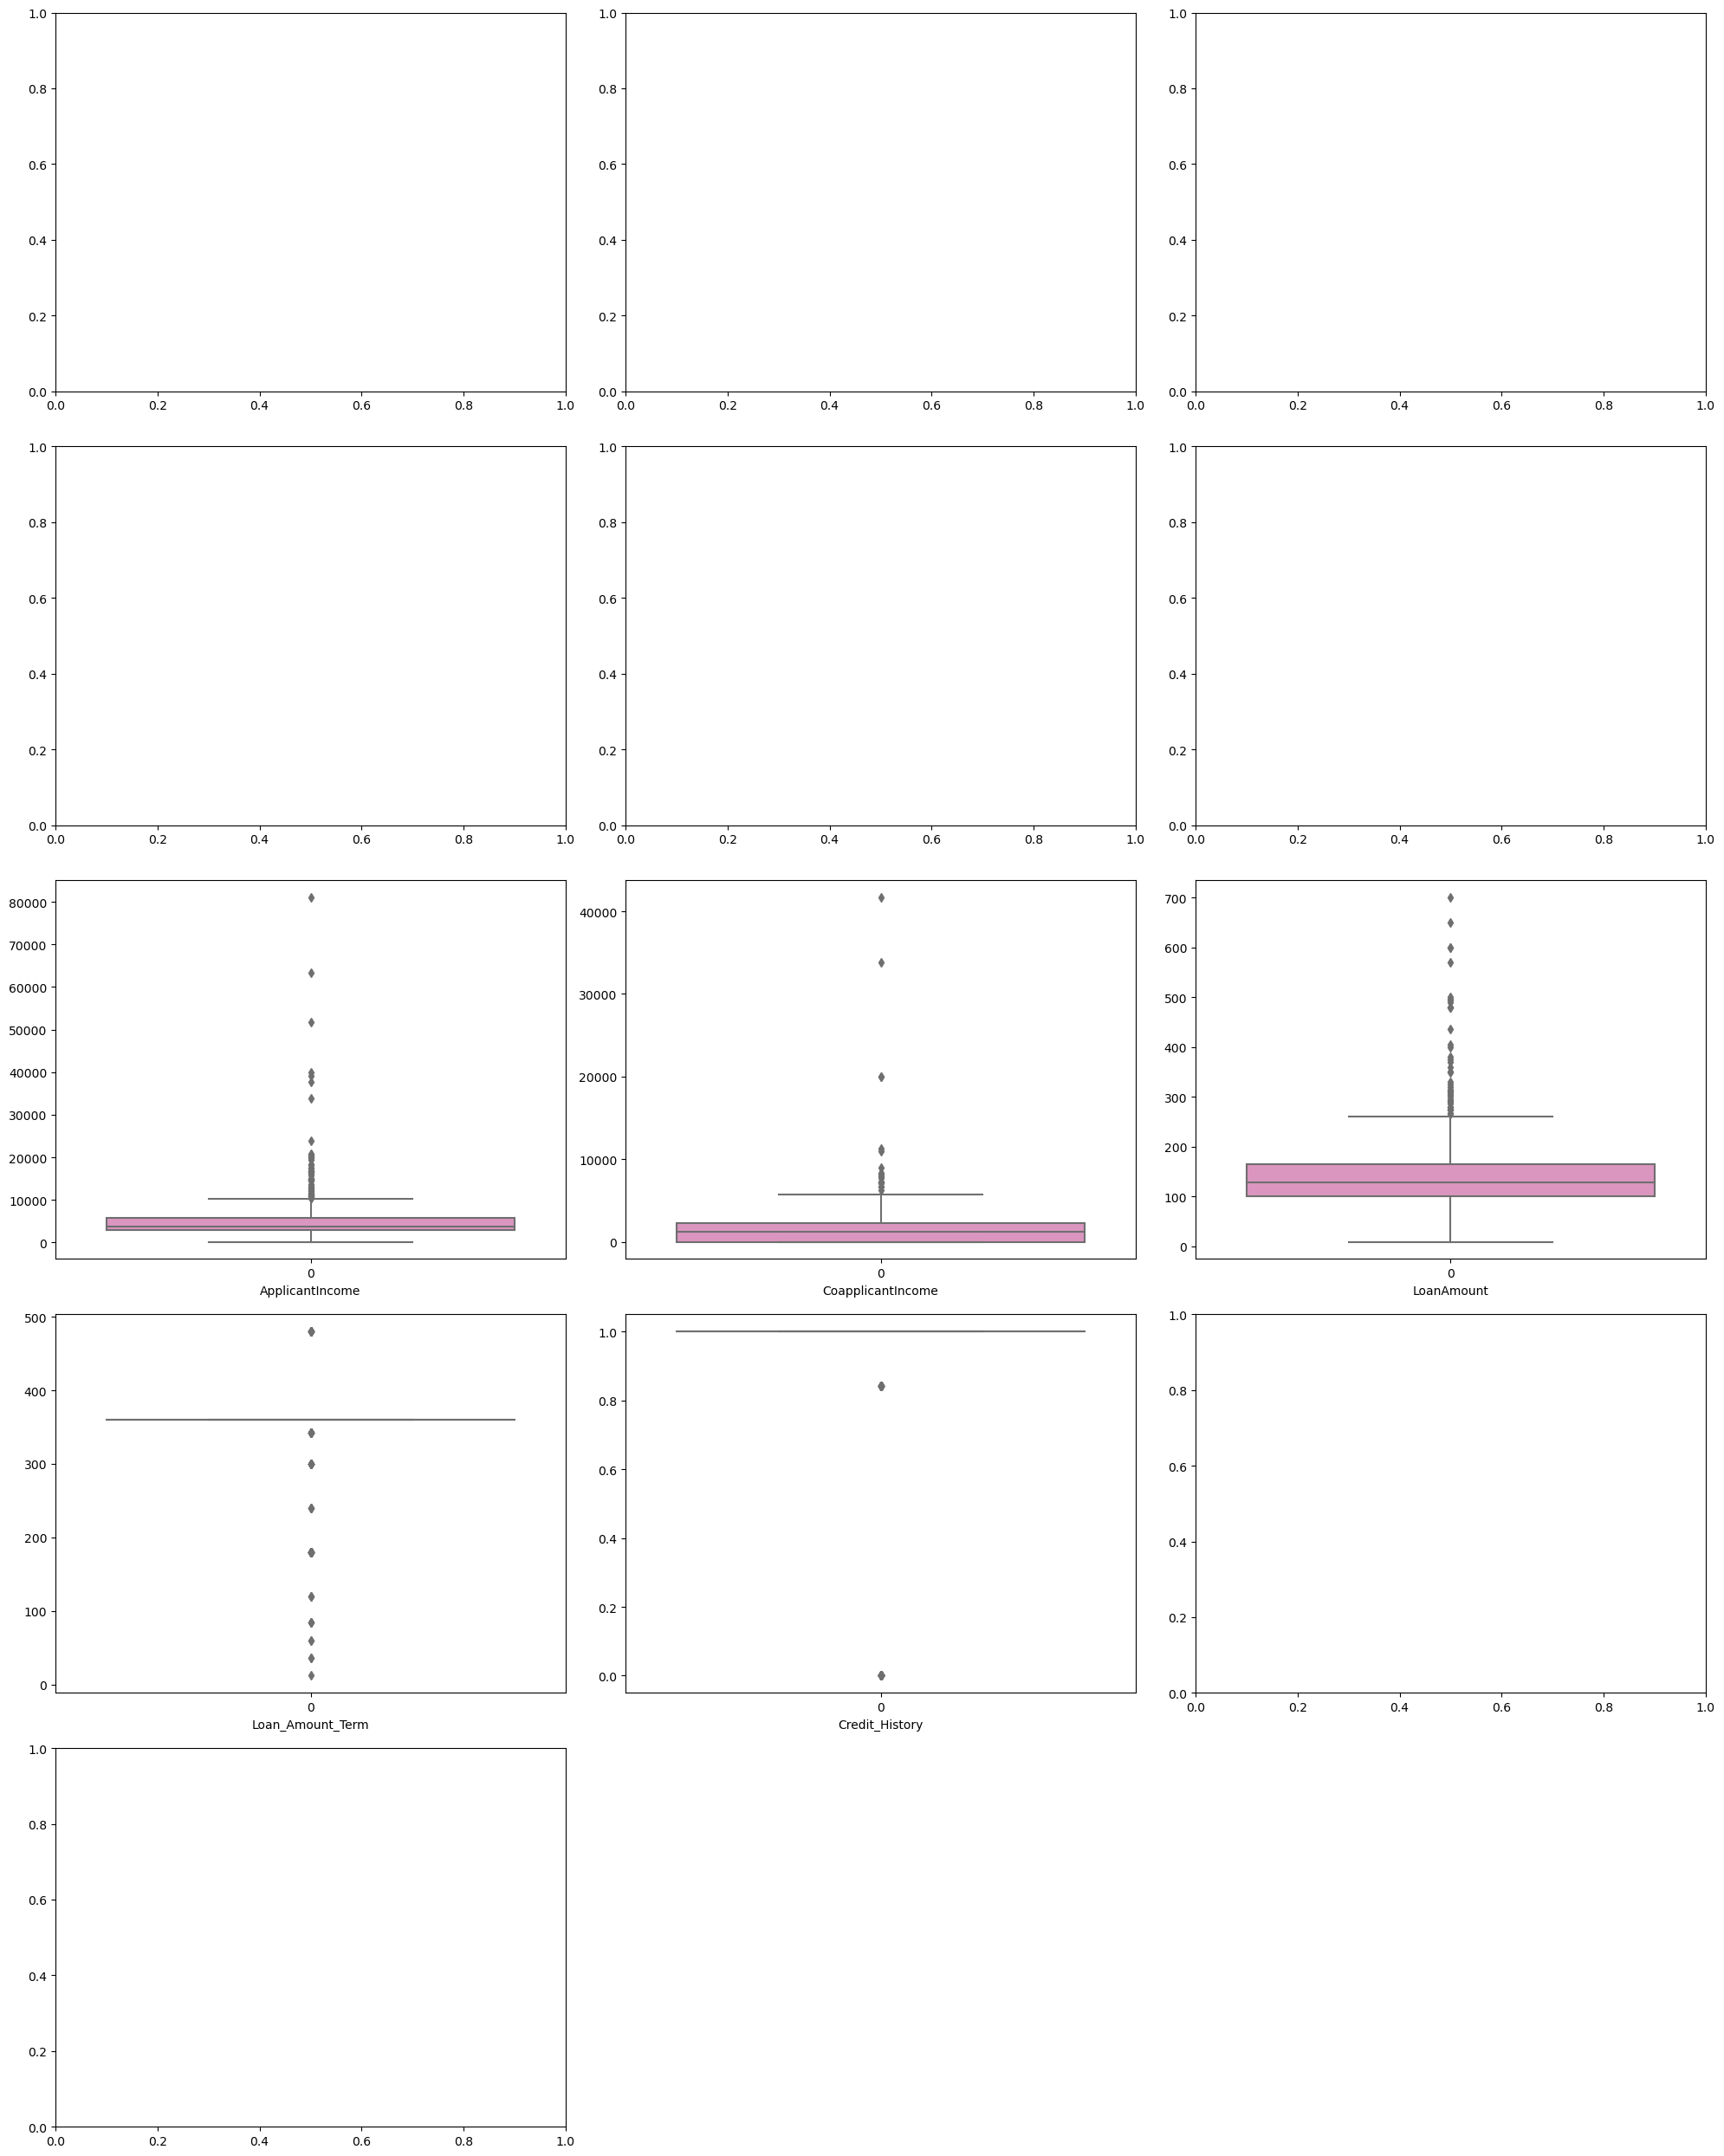

In [49]:
plt.figure(figsize=(20, 25))
p = 1

for i in df.columns:
    if p <= 13:
        plt.subplot(5, 3, p)

        if df[i].dtype in ['float64', 'int64']:
            sns.boxplot(df[i], palette='Set2_r')
            plt.xlabel(i)
    p += 1

plt.tight_layout()
plt.show()

There are many outliers, lets correct them using zscore method for numerical columns 

In [51]:
from scipy.stats import zscore 
out_features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
z=np.abs(zscore(out_features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [52]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [53]:
z.iloc[94,3]

3.451490032828143

In [54]:
df1 = df[(z<3).all(axis = 1)]
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Checking for skewness

In [117]:
df1 = df[(z<3).all(axis = 1)]
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [118]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [119]:
df1.shape

(577, 13)

In [120]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [121]:
df1.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

There are some skewness, lets correct them.

In [122]:
from scipy.stats import boxcox 

df1['ApplicantIncome'], _ = boxcox(df1['ApplicantIncome'] + 1)
df1['CoapplicantIncome'], _ = boxcox(df1['CoapplicantIncome'] + 1)  
df1['LoanAmount'], _ = boxcox(df1['LoanAmount'] + 1)  

In [123]:
df1['Loan_Amount_Term'] = np.square(df1['Loan_Amount_Term']) 
df1['Credit_History'] = np.square(df1['Credit_History']) 

In [124]:
df1.skew()

ApplicantIncome      0.027980
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term    -0.909280
Credit_History      -1.810561
dtype: float64

In [125]:
df1['Loan_Amount_Term'] = np.square(df1['Loan_Amount_Term']) 
df1['Credit_History'] = np.square(df1['Credit_History']) 


In [126]:
df1.skew()

ApplicantIncome      0.027980
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     2.500650
Credit_History      -1.591859
dtype: float64

In [127]:
df1['Loan_Amount_Term'], _ = boxcox(df1['Loan_Amount_Term'] + 1)

In [128]:
df1.skew()

ApplicantIncome      0.027980
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718547
Credit_History      -1.591859
dtype: float64

In [129]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
    
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,11.194696,0.000000,13.201111,5.727361e+07,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,10.799278,9.832468,12.482026,5.727361e+07,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,10.125221,0.000000,9.390267,5.727361e+07,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,9.891002,10.631417,12.148447,5.727361e+07,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,11.236332,0.000000,12.996190,5.727361e+07,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,572.0,0.0,0.0,0.0,0.0,0.0,10.071990,0.000000,9.697075,5.727361e+07,1.0,0.0,1.0
610,573.0,1.0,1.0,3.0,0.0,0.0,10.622890,0.000000,7.486669,7.233450e+06,1.0,0.0,1.0
611,574.0,1.0,1.0,1.0,0.0,0.0,11.725353,6.825818,16.498185,5.727361e+07,1.0,2.0,1.0
612,575.0,1.0,1.0,2.0,0.0,0.0,11.621649,0.000000,14.599374,5.727361e+07,1.0,2.0,1.0


# checking correlation

In [130]:
cor = df1.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.011887,-0.013677,0.059780,0.053923,0.037935,0.023870,-0.034665,-0.001167,-0.011773,-0.041836,-0.164261,0.023708
Gender,-0.011887,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.173082,-0.097638,0.022916,-0.026340,0.017408
Married,-0.013677,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.182006,-0.128208,0.000271,0.010595,0.089026
Dependents,0.059780,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131807,-0.074341,-0.009444,0.002327,0.017872
Education,0.053923,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.126509,-0.067928,-0.089130,-0.068596,-0.092658
Self_Employed,0.037935,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117550,-0.052345,-0.011079,-0.028253,-0.026525
ApplicantIncome,0.023870,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.434072,-0.088056,0.045519,-0.011364,-0.002484
CoapplicantIncome,-0.034665,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.196334,-0.002203,-0.008901,-0.074476,0.079344
LoanAmount,-0.001167,0.173082,0.182006,0.131807,-0.126509,0.117550,0.434072,0.196334,1.000000,0.022149,-0.011821,-0.094220,-0.028999
Loan_Amount_Term,-0.011773,-0.097638,-0.128208,-0.074341,-0.067928,-0.052345,-0.088056,-0.002203,0.022149,1.000000,0.007499,-0.032705,-0.053446


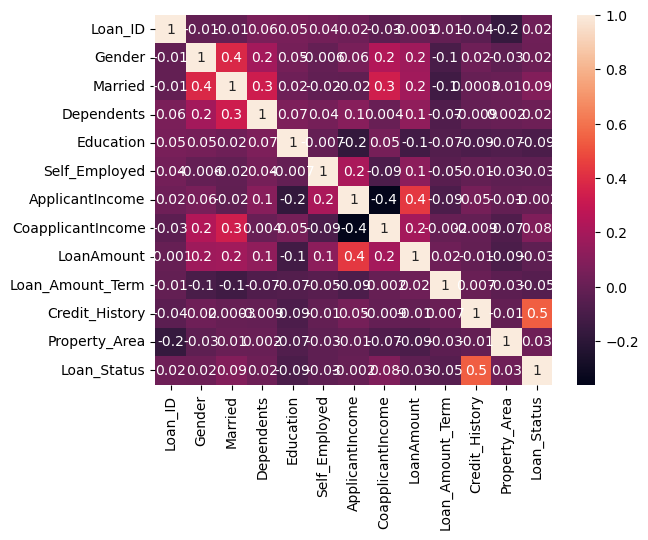

In [131]:
sns.heatmap(df1.corr(), annot = True, fmt = ".1g")
plt.show()

I think loan_id is not related with loan status, so dropping that column.

In [136]:
df1.drop("Loan_ID", axis=1, inplace=True) 

In [137]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,11.194696,0.000000,13.201111,5.727361e+07,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,10.799278,9.832468,12.482026,5.727361e+07,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,10.125221,0.000000,9.390267,5.727361e+07,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,9.891002,10.631417,12.148447,5.727361e+07,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,11.236332,0.000000,12.996190,5.727361e+07,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,10.071990,0.000000,9.697075,5.727361e+07,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,10.622890,0.000000,7.486669,7.233450e+06,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,11.725353,6.825818,16.498185,5.727361e+07,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,11.621649,0.000000,14.599374,5.727361e+07,1.0,2.0,1.0


In [138]:
cor = df1.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.173082,-0.097638,0.022916,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.182006,-0.128208,0.000271,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131807,-0.074341,-0.009444,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.126509,-0.067928,-0.089130,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117550,-0.052345,-0.011079,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.434072,-0.088056,0.045519,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.196334,-0.002203,-0.008901,-0.074476,0.079344
LoanAmount,0.173082,0.182006,0.131807,-0.126509,0.117550,0.434072,0.196334,1.000000,0.022149,-0.011821,-0.094220,-0.028999
Loan_Amount_Term,-0.097638,-0.128208,-0.074341,-0.067928,-0.052345,-0.088056,-0.002203,0.022149,1.000000,0.007499,-0.032705,-0.053446
Credit_History,0.022916,0.000271,-0.009444,-0.089130,-0.011079,0.045519,-0.008901,-0.011821,0.007499,1.000000,-0.012705,0.537699


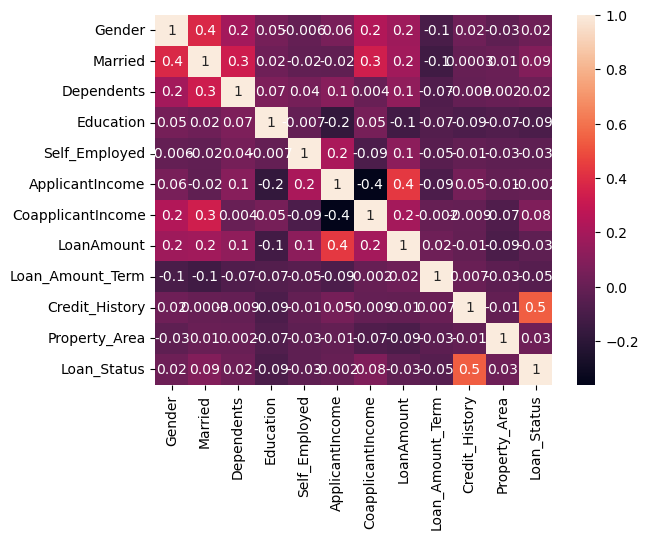

In [139]:
sns.heatmap(df1.corr(), annot = True, fmt = ".1g")
plt.show()

In [140]:
cor['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.537699
Married              0.089026
CoapplicantIncome    0.079344
Property_Area        0.026507
Dependents           0.017872
Gender               0.017408
ApplicantIncome     -0.002484
Self_Employed       -0.026525
LoanAmount          -0.028999
Loan_Amount_Term    -0.053446
Education           -0.092658
Name: Loan_Status, dtype: float64

<Axes: >

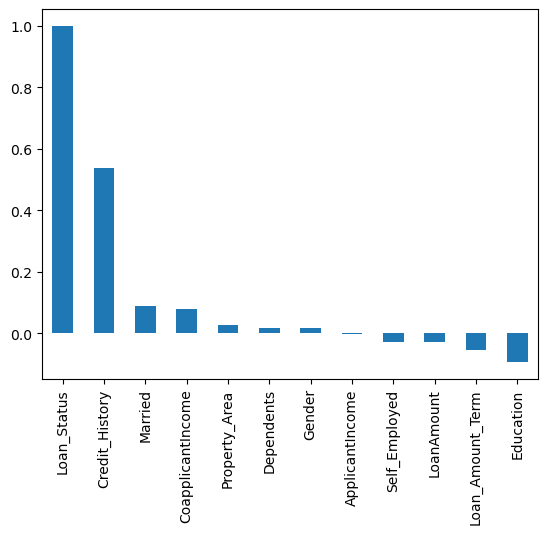

In [141]:
cor['Loan_Status'].sort_values(ascending = False).plot(kind='bar')

# Feature scaling and standardisation¶

In [142]:
x=df1.drop("Loan_Status", axis=1)
y=df1['Loan_Status']

In [143]:
x.shape

(577, 11)

In [144]:
y.shape

(577,)

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.142612,0.514888,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.142612,0.514888,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527200,-1.122446,-1.443112,0.142612,0.514888,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.142612,0.514888,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.142612,0.514888,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.142612,0.514888,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.559143,0.514888,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.142612,0.514888,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.142612,0.514888,1.227472


In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.222334,Gender
1,1.417550,Married
2,1.167356,Dependents
3,1.069174,Education
4,1.053423,Self_Employed
5,1.766077,ApplicantIncome
6,1.584405,CoapplicantIncome
7,1.549553,LoanAmount
8,1.048147,Loan_Amount_Term
9,1.012879,Credit_History


In [147]:
y.value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 0.867816091954023 at random state 42


In [149]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [150]:
y1.value_counts()

1.0    398
0.0    398
Name: Loan_Status, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 0.891213389121339 at random state 161


There is a better accuracy if we sample the output_var, so proceeding with the sampled y

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = rs) 


In [153]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

In [154]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8702928870292888
[[ 87  23]
 [  8 121]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       110
         1.0       0.84      0.94      0.89       129

    accuracy                           0.87       239
   macro avg       0.88      0.86      0.87       239
weighted avg       0.88      0.87      0.87       239



In [155]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.8619246861924686
[[ 92  18]
 [ 15 114]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       110
         1.0       0.86      0.88      0.87       129

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



In [156]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7322175732217573
[[ 62  48]
 [ 16 113]]
              precision    recall  f1-score   support

         0.0       0.79      0.56      0.66       110
         1.0       0.70      0.88      0.78       129

    accuracy                           0.73       239
   macro avg       0.75      0.72      0.72       239
weighted avg       0.74      0.73      0.72       239



In [157]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7740585774058577
[[ 69  41]
 [ 13 116]]
              precision    recall  f1-score   support

         0.0       0.84      0.63      0.72       110
         1.0       0.74      0.90      0.81       129

    accuracy                           0.77       239
   macro avg       0.79      0.76      0.76       239
weighted avg       0.79      0.77      0.77       239



In [158]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.803347280334728
[[ 74  36]
 [ 11 118]]
              precision    recall  f1-score   support

         0.0       0.87      0.67      0.76       110
         1.0       0.77      0.91      0.83       129

    accuracy                           0.80       239
   macro avg       0.82      0.79      0.80       239
weighted avg       0.81      0.80      0.80       239



In [159]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7949790794979079
[[ 89  21]
 [ 28 101]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       110
         1.0       0.83      0.78      0.80       129

    accuracy                           0.79       239
   macro avg       0.79      0.80      0.79       239
weighted avg       0.80      0.79      0.80       239



In [160]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8493723849372385
[[ 89  21]
 [ 28 101]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       110
         1.0       0.83      0.78      0.80       129

    accuracy                           0.79       239
   macro avg       0.79      0.80      0.79       239
weighted avg       0.80      0.79      0.80       239



# Cross val score

In [161]:
#Random forest 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predRFC)-score.mean())

[0.74375    0.77358491 0.89308176 0.88050314 0.90566038]
0.839316037735849
Difference is 0.0309768492934398


In [162]:
#Extra Trees
score = cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predETC)-score.mean())

[0.76875    0.83647799 0.86792453 0.88050314 0.87421384]
0.8455738993710693
Difference is 0.016350786821399343


In [163]:
#Logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predLR)-score.mean())

[0.7        0.71069182 0.7672956  0.68553459 0.67924528]
0.7085534591194969
Difference is 0.023664114102260436


In [164]:
#SVC
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predsvc)-score.mean())

[0.70625    0.75471698 0.79245283 0.72955975 0.74213836]
0.7450235849056603
Difference is 0.029034992500197365


In [165]:
#Adaboost
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predABC)-score.mean())

[0.65625    0.69811321 0.82389937 0.75471698 0.77987421]
0.7425707547169811
Difference is 0.060776525617746935


In [166]:
#Bagging
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predBC)-score.mean())

[0.70625    0.77358491 0.86163522 0.82389937 0.87421384]
0.8079166666666667
Difference is -0.012937587168758813


In [167]:
#Gradient boosting
score = cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predGBC)-score.mean())

[0.675      0.72327044 0.89937107 0.86163522 0.86792453]
0.805440251572327
Difference is 0.04393213336491153


Based on the cross val score , difference and the indivdual model performance, selecting RFC- Random Forest Classifier as the best fitting model.

# Hyperparameter tuning

In [169]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],  
    'n_estimators': [50, 100, 150, 200, 350],  
    'max_depth': [None, 10, 30],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False],  
    'random_state': [10, 50, 5000],  
    'n_jobs': [-2, -1, 1]  
}


In [172]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, n_jobs=-1)

In [173]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 350],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 5000]})

In [174]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 5000}

In [190]:
final_model = ExtraTreesClassifier(criterion='gini',bootstrap=False, max_depth=None, max_features='sqrt', n_estimators=50, n_jobs=-2, random_state=5000)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(str(acc*100) + "%")

84.10041841004184%


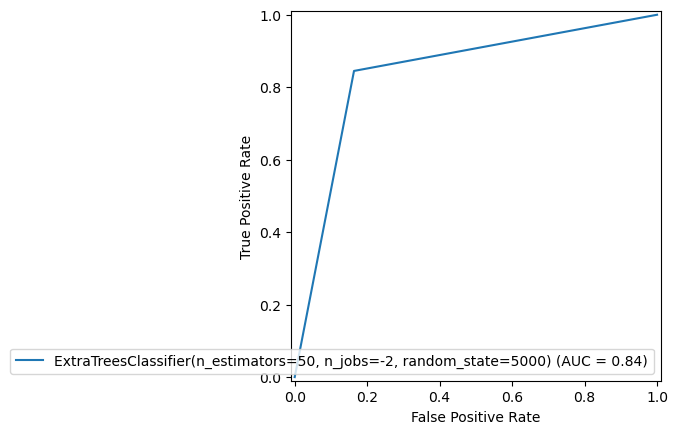

In [191]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=final_model)
display.plot()

With an accuracy of 84%, the model successfully predicts whether an applicant's loan will be approved based on the provided dataset. This predictive capability can significantly aid in decision-making processes for loan approvals, potentially streamlining and optimizing the lending process for both applicants and lenders